## My Findings:

1. I found that the dataset is a very unbiased one when it comes to gender. It was made up of 50.6% male mice and 49.4% female mice. 

2. On average, the Capomulin drug regimen was very effective. The correlation between the time and tumor volume was a perfect negative slope. 

3. With the Capomulin drug regimen, the weight of the mouse and the tumor volume were almost perfectly correlated. As the weight went down, so did the tumor volume. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
mouseFile = "data/Mouse_metadata.csv"
studyFile = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouseFile)
study_results = pd.read_csv(studyFile)

In [3]:
# Combine the two files
mouse_df = pd.DataFrame(mouse_metadata)
study_df = pd.DataFrame(study_results)

df = pd.merge(mouse_df, study_df, on="Mouse ID")
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics
Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen. 

In [4]:
# Grab the columns that will be necessary
sumStat_df = df.loc[:,["Drug Regimen", "Tumor Volume (mm3)"]].rename(columns = {"Tumor Volume (mm3)":"Mean"})
# Create the columns we need filled with the base data
sumStat_df["Median"] = sumStat_df["Mean"]
sumStat_df["StDev"] = sumStat_df["Mean"]
sumStat_df["Variance"] = sumStat_df["Mean"]
sumStat_df["SEM"] = sumStat_df["Mean"]
# Group by the drug regimen and do the math
sumStat_df = sumStat_df.groupby(["Drug Regimen"], as_index=False).agg({"Mean":"mean", "Median":"median","StDev":"std", "Variance":"var", "SEM":"sem"})
sumStat_df

,Drug Regimen,Mean,Median,StDev,Variance,SEM
0,Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
1,Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
2,Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
3,Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
4,Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
5,Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
6,Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
7,Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
8,Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111
9,Zoniferol,53.236507,51.818479,6.966589,48.533355,0.516398


## Bar Plot - Pandas
Generate a bar plot showing number of data points for each treatment regimen using pandas

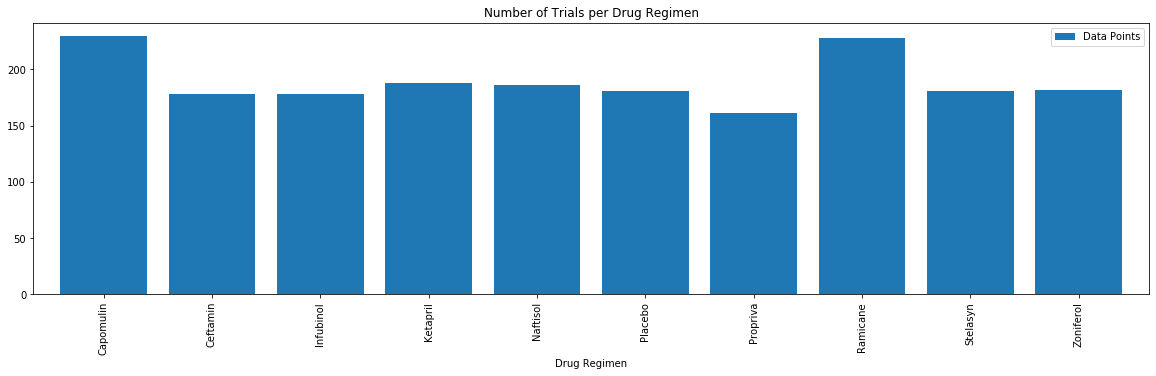

In [5]:
bar_df = df.loc[:, ["Mouse ID", "Drug Regimen"]].rename(columns = {"Mouse ID" : "Data Points"})
pdBar_df = bar_df
pdBar_df = pdBar_df.groupby(["Drug Regimen"], as_index = True).agg({"Data Points":"count"})
pdBar_df.plot(kind = "bar", figsize=(20,5), title="Number of Trials per Drug Regimen", width=.8)
pdBar_df.plot

## Bar Plot - Pyplot
Generate a bar plot showing number of data points for each treatment regimen using Pyplot

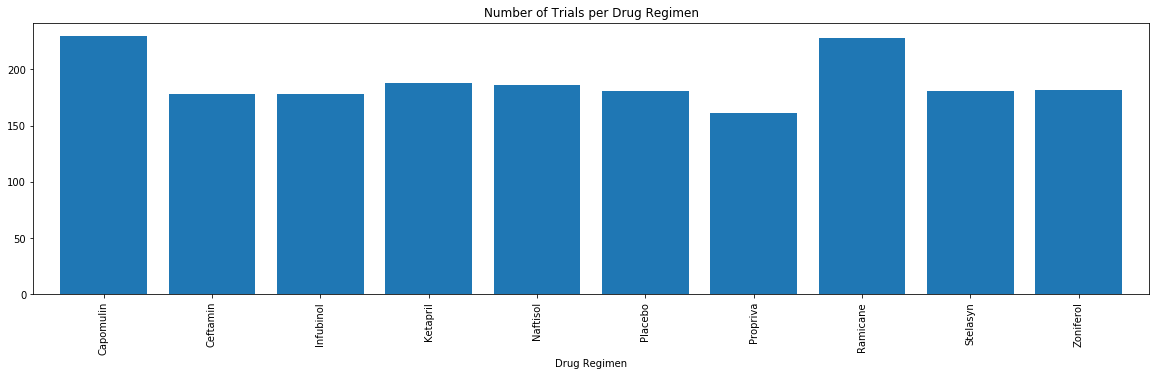

In [6]:
pltBar_df = bar_df
pltBar_df = pltBar_df.groupby(["Drug Regimen"], as_index=False).agg({"Data Points":"count"})
x_axis = np.arange(len(pltBar_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,5))
plt.bar(x_axis, pltBar_df["Data Points"], align="center")
plt.xticks(tick_locations, pltBar_df["Drug Regimen"], rotation="vertical")
plt.title("Number of Trials per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xlim(-.65, len(pltBar_df["Drug Regimen"])-.35)
plt.show()


## Pie Plot - Pandas
Generate a pie plot showing the distribution of female versus male mice using pandas

In [7]:
# Create the dataframe, then split them up
pie_df = df.loc[:, ["Mouse ID", "Sex"]].rename(columns={"Mouse ID":"Count"})
pie_df = pie_df.groupby(pie_df["Sex"], as_index=False).agg({"Count":"count"})
pltPie_df = pie_df
pdPie_df = pie_df
pie_df

,Sex,Count
0,Female,935
1,Male,958


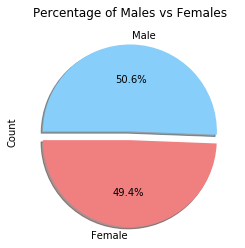

In [8]:
explode = (0.1, 0)
plot = pdPie_df.plot.pie(
    y="Count", 
    startangle=180, 
    explode=explode, 
    labels=pltPie_df["Sex"], 
    shadow=True, 
    colors=["lightcoral", "lightskyblue"], 
    autopct="%1.1f%%", 
    title="Percentage of Males vs Females",
    legend=False
    )

## Pie Plot - Pyplot
Generate a pie plot showing the distribution of female versus male mice using Pyplot

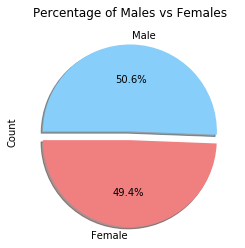

In [9]:
colors = ["lightcoral", "lightskyblue"]
explode = (0.1, 0)

plt.pie(
    pltPie_df["Count"], 
    explode=explode, 
    labels=pltPie_df["Sex"], 
    colors=colors, 
    autopct="%1.1f%%", 
    shadow=True, 
    startangle=180
    )
plt.title("Percentage of Males vs Females")
plt.ylabel("Count")
plt.show()

## Line and scatter plots

Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

The correlation between the Timepoint and the Tumor Volume is -1.0
There is a perfect negative correlation between the Timepoint and the Tumor Volume for the Capomulin regimen.


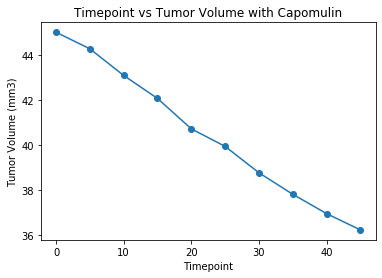

In [17]:
ln_df = df.loc[:,["Drug Regimen","Timepoint", "Tumor Volume (mm3)"]]
ln_df = ln_df.loc[ln_df["Drug Regimen"]=="Capomulin"]
ln_df = ln_df.groupby(["Drug Regimen","Timepoint"], as_index=False).agg({"Tumor Volume (mm3)":"mean"})
ln_df = ln_df.pivot(index="Timepoint", columns="Drug Regimen")["Tumor Volume (mm3)"]

x_axis= ln_df.index
y_axis= ln_df["Capomulin"]
correlation = st.pearsonr(x_axis,y_axis)

plt.title("Timepoint vs Tumor Volume with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis, marker="o")
print(f"The correlation between the Timepoint and the Tumor Volume is {round(correlation[0],2)}")
print("There is a perfect negative correlation between the Timepoint and the Tumor Volume for the Capomulin regimen.")
plt.show()

The correlation between the Weight of the mouse and the Tumor Volume is 0.95
There is a strong correlation between the Weight of the mouse and the Tumor Volume for the Capomulin Drug Regimen


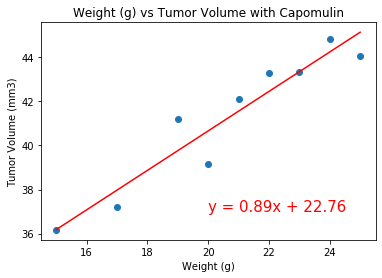

In [18]:
sctr_df = df.loc[:,["Drug Regimen","Weight (g)", "Tumor Volume (mm3)"]]
sctr_df = sctr_df.loc[sctr_df["Drug Regimen"]=="Capomulin"]
sctr_df = sctr_df.groupby(["Drug Regimen","Weight (g)"], as_index=False).agg({"Tumor Volume (mm3)":"mean"})
sctr_df = sctr_df.pivot(index="Weight (g)", columns="Drug Regimen")["Tumor Volume (mm3)"]

x_axis= sctr_df.index
y_axis= sctr_df["Capomulin"]
correlation = st.pearsonr(x_axis,y_axis)

# Calculate the slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Weight (g) vs Tumor Volume with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.scatter(x_axis, y_axis, marker="o")
plt.plot(x_axis, regress_values, "-r")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
print(f"The correlation between the Weight of the mouse and the Tumor Volume is {round(correlation[0],2)}")
print("There is a strong correlation between the Weight of the mouse and the Tumor Volume for the Capomulin Drug Regimen")
plt.show()